In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\alber\anaconda3\lib\site-packages (from wordcloud) (3.5.0)



In [4]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()


import re
import string

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, plot_confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer


plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

In [5]:
df = pd.read_csv("Data_Gp3.csv", sep=";", encoding='cp1252')
df.head()

,id,is_misinfo,Texts
0,"1,34361E+18",0,Happy to be getting my first dose of vaccine! ...
1,"1,38757E+18",0,"2nd shot done, ready to run (in 10 days of cou..."
2,"1,34685E+18",1,I wonder are the Garda we warned that they wou...
3,"1,3466E+18",0,if you think watch is better than &amp;burn do...
4,"1,34409E+18",0,I’m so sore from legs yesterday and I got the ...


In [7]:
print(df.shape)

(6000, 3)


In [6]:
# Drop NaN values in text column

df.dropna(subset=['Texts'], inplace=True)

<AxesSubplot:xlabel='is_misinfo', ylabel='count'>

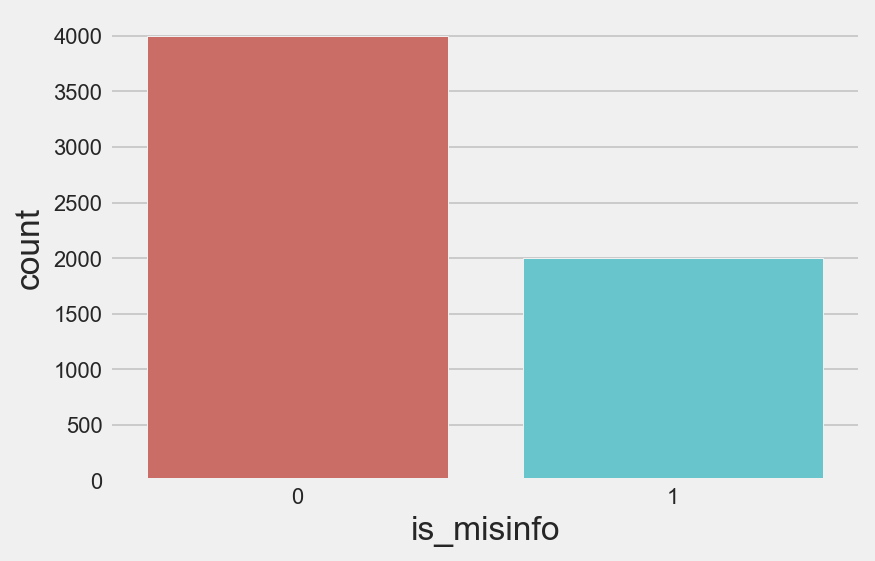

In [7]:
# Is the labelled data balance?
df['is_misinfo'].value_counts()

def create_distribution(dataFile):
  return sns.countplot(x='is_misinfo', data=dataFile, palette='hls')

create_distribution(df)

In [8]:
# Create function with text cleaning techniques usinx regex

def clean_text_step1(text):
    '''
    Looking for speciffic patterns in the text and 
    removing them or replacing with space
    Function returns string
    '''
        
    # make text lowercase
    text = text.lower()
    
    # string punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # removing patterns and replace it with nothing
    text = re.sub('\[.*?\]', '', text)
 
    # removing digits if they surounded with text or digit
    text = re.sub('\w*\d\w*', '', text)
    
    # make just 1 space if there is more then 1
    text = re.sub('\s+', ' ', text)
    
    # replace new line symbol with space
    text = re.sub('\n', ' ', text)
    
    # removing any quotes
    text = re.sub('\"+', '', text)
    
    # removing &amp;
    text = re.sub('(\&amp\;)', '', text)
    
    # cleaning from user name
    text = re.sub('(@[^\s]+)', '', text)
    
    # looking for # and replacing it
    text = re.sub('(#[^\s]+)', '', text)
    
    # removing `rt`
    text = re.sub('(rt)', '', text)

    # looking for `httptco`
    text = re.sub('(httptco)', '', text)
    
    # looking for `mkr`
    text = re.sub('(mkr)', '', text)
    
    text = re.sub('(sexist)', '', text)
    
    text = re.sub('(like)', '', text)
    
    text = re.sub('(women)', '', text)

    return text

In [9]:
# Applying function for cleaning text data

df['Texts'] = df['Texts'].apply(clean_text_step1)
df.head()

,id,is_misinfo,Texts
0,"1,34361E+18",0,happy to be getting my first dose of vaccine i...
1,"1,38757E+18",0,shot done ready to run in days of course walg...
2,"1,34685E+18",1,i wonder are the garda we warned that they wou...
3,"1,3466E+18",0,if you think watch is better than ampburn do n...
4,"1,34409E+18",0,i’m so sore from legs yesterday and i got the ...


In [10]:
# function to filter data with words that contain more then 2 characters
def txt_filtering(row, n =2):
    new_words = []
    for w in row['Texts'].split(' '):
        if len(w) > 2:
            new_words.append(w)
    row['Texts'] = ' '.join(new_words)
    return row

In [11]:
df = df.apply(txt_filtering, axis = 1)

In [12]:
# Tokenization Data (splitting into smaller pieces) and removing stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def tokenize_text(text):
    
    """
    Tokenize document and create visualization of most recent words
    Wiil filter data with stopwords
    """
    tokens = nltk.word_tokenize(text)
    
    stopwords_removed = [token for token in tokens if token not in stopwords_list] 
    
    return stopwords_removed


In [14]:
nltk.download('punkt')
processed_text = list(map(tokenize_text, df['Texts']))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
def plot_frequency(data):
    """
    Ploting words frequency distribution
    from corpus. data should be list of lists with strings
    """
    words_lst = []
    for tweet in data:
        for word in tweet:
            words_lst.append(word)

    fdist = FreqDist(words_lst)
    plt.figure(figsize=(10,6))
    fdist.plot(30, title = "Frequency distribution of words within corpus")
    plt.show()

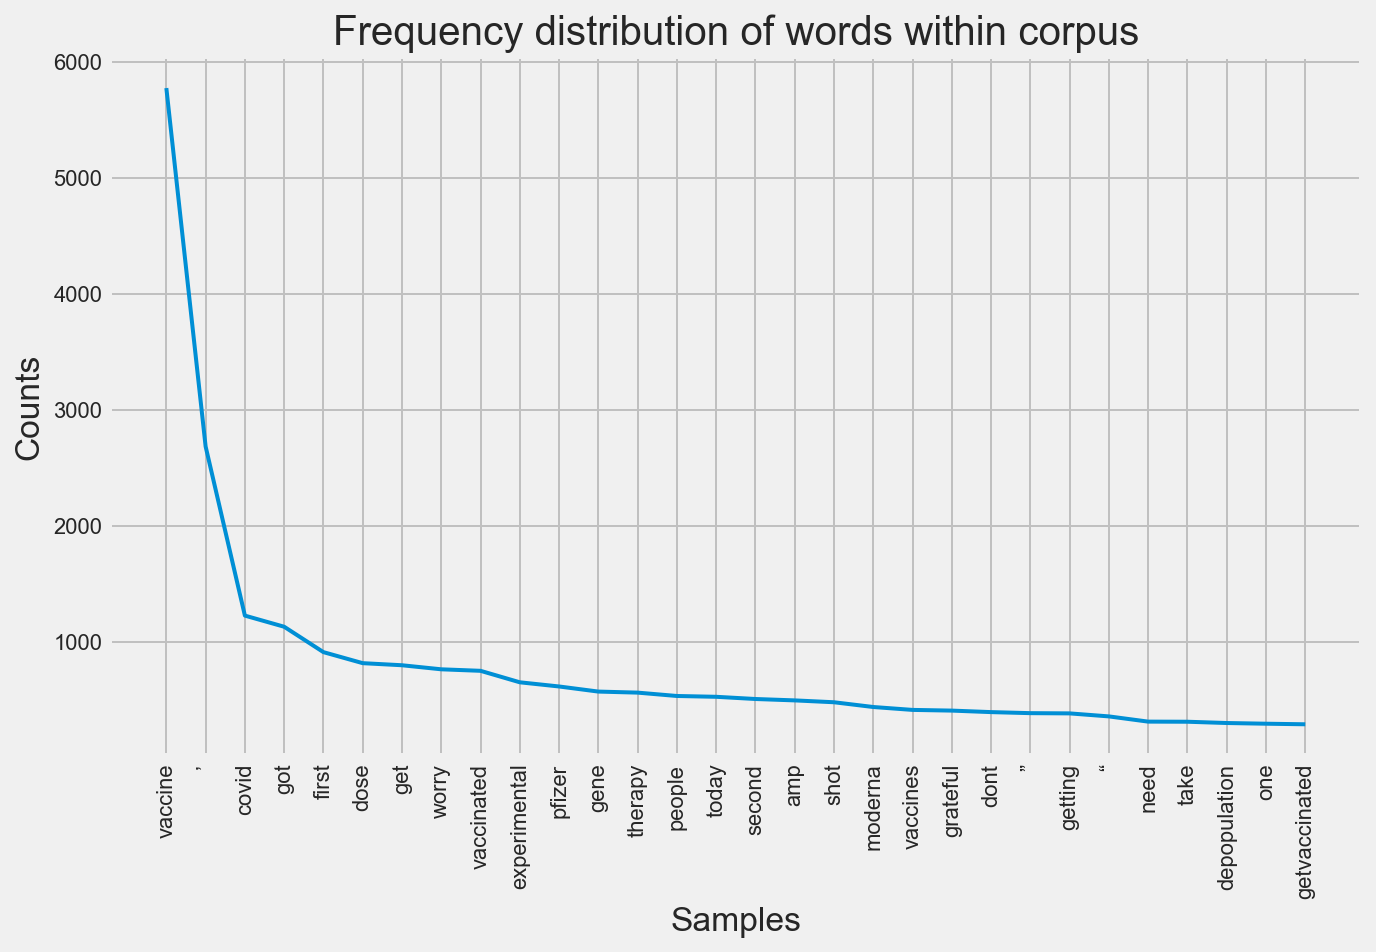

In [16]:
plot_frequency(processed_text)

In [17]:
processed_text[:2]

[['happy',
  'getting',
  'first',
  'dose',
  'vaccine',
  'time',
  'fked',
  'vaccines',
  'arms',
  'thats',
  'going',
  'happen',
  'upyourscorona'],
 ['shot',
  'done',
  'ready',
  'run',
  'days',
  'course',
  'walgreens',
  'awesome',
  'pfizer',
  'great',
  '’',
  'hesitant',
  'hit',
  'dogs',
  'need',
  'vax',
  'boarding',
  'kids',
  'need',
  'vax',
  'school',
  'plus',
  'keep',
  'dying',
  'going',
  'hospital…getvaccinated',
  'vaccinated']]

In [18]:
total_vocab = set()
for tweet in processed_text:
    total_vocab.update(tweet)
len(total_vocab)

12267

In [19]:
# Create Docunent-Term Matrix
# look at the corpus
df.head()

,id,is_misinfo,Texts
0,"1,34361E+18",0,happy getting first dose vaccine its time that...
1,"1,38757E+18",0,shot done ready run days course walgreens was ...
2,"1,34685E+18",1,wonder are the garda warned that they would on...
3,"1,3466E+18",0,you think watch better than ampburn not worry ...
4,"1,34409E+18",0,i’m sore from legs yesterday and got the vacci...


In [20]:
# Using CountVextorizer from sklearn 
# in data_dtm each row represents different document
# and each collumn represents word from vocab

cv = CountVectorizer(stop_words = 'english')
df_cv = cv.fit_transform(df.Texts)
data_dtm = pd.DataFrame(df_cv.toarray(), columns= cv.get_feature_names())
data_dtm.index = df.index
data_dtm.head()

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaahhhhh,aadhaar,aajtak,aarogyasetu,aarogyasetuserverdown,aaron,aarp,aasan,aav,abandoned,...,zombie,zombieland,zoobear,zoom,zooted,zucker,zuckerberg,zuma,zweli,zzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Lemmatizing Data
# function to creat a list with all lemmatized words

def lematizing_text(data):
    
    """
    Lematizing words from the corpus data
    Returns list of strings with lematized 
    words in each string
    """
    
    lemmatizer = WordNetLemmatizer() 
    lemmatized_output = []

    for tweet in data:
        lemmed = ' '.join([lemmatizer.lemmatize(w) for w in tweet])
        lemmatized_output.append(lemmed)
        
    return lemmatized_output

In [22]:
nltk.download('wordnet')
lemmatized_data = lematizing_text(processed_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
lemmatized_data[:5]

['happy getting first dose vaccine time fked vaccine arm thats going happen upyourscorona',
 'shot done ready run day course walgreens awesome pfizer great ’ hesitant hit dog need vax boarding kid need vax school plus keep dying going hospital…getvaccinated vaccinated',
 'wonder garda warned would one first line get untested vaccine still smiling',
 'think watch better ampburn worry whats vaccine',
 '’ sore leg yesterday got vaccine today arm ’ sore grateful soreness wow bad']

In [24]:
# Most Frequent Words for Each Class
df_freq_mis = df[df['is_misinfo']==1]
df_freq_not = df[df['is_misinfo']==0]

In [25]:
data_misinfo = df_freq_mis['Texts']
data_notmis = df_freq_not['Texts']

In [26]:
def freq_wrds_class(data, n = 20, show= True):
    
    """
    Returns list of 2 tuples that represents frequency
    of words in document
    
    data - Series with string data
    n - number of most common words to show
    """
    
    protc_data = list(map(tokenize_text, data))
    
    total_vocab = set()
    for comment in protc_data:
        total_vocab.update(comment)
    
    if show:
        print('Total words in vocab : {}'.format(len(total_vocab)))
        print (30*'-')
        print('Top {} most frequent words:'.format(n))
        flat_data = [item for sublist in protc_data for item in sublist]
        freq = FreqDist(flat_data)
        return freq.most_common(n)
    flat_data = [item for sublist in protc_data for item in sublist]
    freq = FreqDist(flat_data)
    
    return freq

In [27]:
# Top 20 Misinfo:
freq_wrds_class(data_misinfo, show=True)

Total words in vocab : 6801
------------------------------
Top 20 most frequent words:


[('vaccine', 2134),
 ('experimental', 641),
 ('’', 588),
 ('gene', 563),
 ('therapy', 554),
 ('covid', 383),
 ('people', 334),
 ('”', 314),
 ('depopulation', 297),
 ('vaccines', 297),
 ('“', 296),
 ('amp', 259),
 ('take', 225),
 ('virus', 211),
 ('mrna', 206),
 ('pfizer', 204),
 ('untested', 170),
 ('get', 169),
 ('rushed', 163),
 ('bioweapon', 125)]

In [ ]:
# Top 20 not mis:
freq_wrds_class(data_notmis)

Total words in vocab : 8191
------------------------------
Top 20 most frequent words:


[('vaccine', 3638),
 ('’', 2094),
 ('got', 1092),
 ('first', 871),
 ('covid', 841),
 ('dose', 803),
 ('worry', 759),
 ('vaccinated', 686),
 ('get', 627),
 ('today', 508),
 ('second', 490),
 ('shot', 419),
 ('pfizer', 409),
 ('grateful', 405),
 ('moderna', 354),
 ('getvaccinated', 287),
 ('getting', 284),
 ('dont', 272),
 ('need', 258),
 ('whats', 255)]

**Modelling**

In [28]:
# Based Line Model
X = lemmatized_data
y = df['is_misinfo']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(X_train)  # make sure in train
x_test_tfidf = tfidf.transform(X_test)   # make sure on test

In [30]:
non_zero_cols = x_train_tfidf.nnz / float(x_train_tfidf.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Tweets: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(x_train_tfidf.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Tweets: 12.494444444444444
Percentage of columns containing ZERO: 0.9988283529215637


In [31]:
# Lets Keep All models Results in dictionary for future visualization
eval_metrics_dict = {}

In [32]:
# Random Forrest Baseline
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(x_train_tfidf, y_train)
rf_test_preds = rf_classifier.predict(x_test_tfidf)

In [33]:
rf_precision = precision_score(y_test, rf_test_preds)
rf_recall = recall_score(y_test, rf_test_preds)
rf_acc_score = accuracy_score(y_test, rf_test_preds)
rf_f1_score = f1_score(y_test, rf_test_preds)
print('Random Forest:')

print('Precision: {:.4}'.format(rf_precision))
print('Recall: {:.4}'.format(rf_recall))

print("Testing Accuracy: {:.4}".format(rf_acc_score))
print("F1 Score: {:.4}".format(rf_f1_score))

Random Forest:
Precision: 0.9747
Recall: 0.9369
Testing Accuracy: 0.97
F1 Score: 0.9554


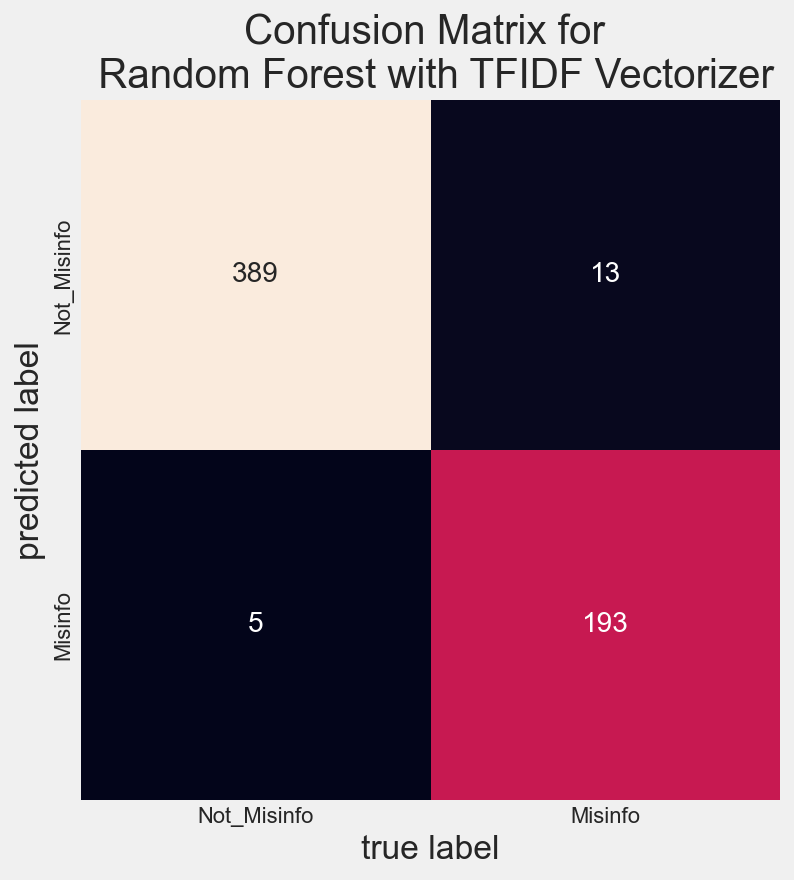

In [34]:
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_test, rf_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Misinfo', 'Misinfo'], yticklabels=['Not_Misinfo', 'Misinfo'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix for \n Random Forest with TFIDF Vectorizer')
#plt.savefig('../images/matrix.png')
plt.show()

In [35]:
eval_metrics_dict['Random Forest Baseline'] = {'precision' : '{:.4}'.format(rf_precision), 'recall': '{:.4}'.format(rf_recall), 'f1-score': '{:.4}'.format(rf_f1_score) }

In [36]:
# Logistic Regression Baseline
logreg = LogisticRegression()
logreg.fit(x_train_tfidf, y_train)
logreg_test_preds = logreg.predict(x_test_tfidf)

In [37]:
log_precision = precision_score(y_test, logreg_test_preds)
log_recall = recall_score(y_test, logreg_test_preds)
log_acc_score = accuracy_score(y_test, logreg_test_preds)
log_f1_score = f1_score(y_test, logreg_test_preds)
print('Logistic Regression:')

print('Precision: {:.4}'.format(log_precision))
print('Recall: {:.4}'.format(log_recall))

print("Testing Accuracy: {:.4}".format(log_acc_score))
print("F1 Score: {:.4}".format(log_f1_score))

Logistic Regression:
Precision: 0.9798
Recall: 0.9417
Testing Accuracy: 0.9733
F1 Score: 0.9604


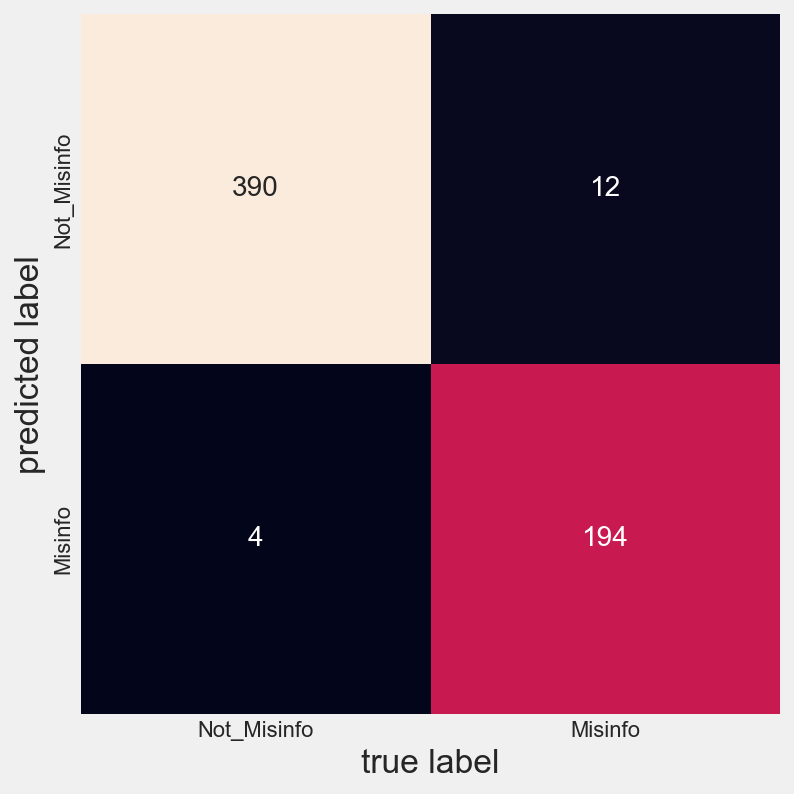

In [38]:
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_test, logreg_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Misinfo', 'Misinfo'], yticklabels=['Not_Misinfo', 'Misinfo'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [39]:
eval_metrics_dict['Logistic Regression Baseline'] = {'precision' : '{:.4}'.format(log_precision), 'recall': '{:.4}'.format(log_recall), 'f1-score': '{:.4}'.format(log_f1_score) }

In [40]:
# Naive Bayes Baseline
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
nb_test_preds = nb.predict(x_test_tfidf)

In [41]:
nb_precision = precision_score(y_test, nb_test_preds)
nb_recall = recall_score(y_test, nb_test_preds)
nb_acc_score = accuracy_score(y_test, nb_test_preds)
nb_f1_score = f1_score(y_test, nb_test_preds)
print('Naive Bayes:')

print('Precision: {:.4}'.format(nb_precision))
print('Recall: {:.4}'.format(nb_recall))

print("Testing Accuracy: {:.4}".format(nb_acc_score))
print("F1 Score: {:.4}".format(nb_f1_score))

Naive Bayes:
Precision: 0.963
Recall: 0.8835
Testing Accuracy: 0.9483
F1 Score: 0.9215


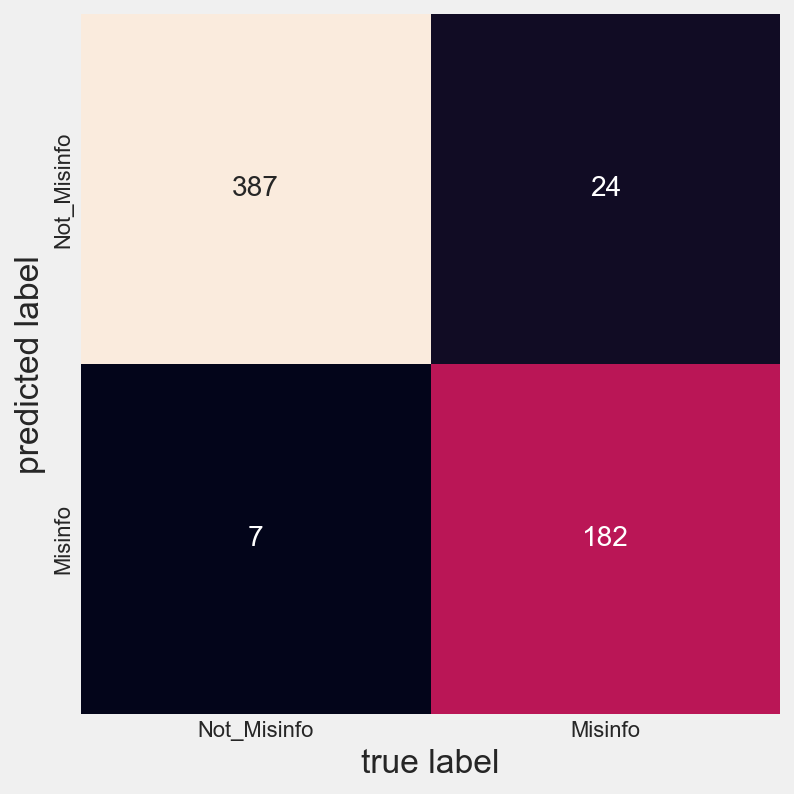

In [42]:
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_test, nb_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Misinfo', 'Misinfo'], yticklabels=['Not_Misinfo', 'Misinfo'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [43]:
eval_metrics_dict['Naive Bayes Baseline'] = {'precision' : '{:.4}'.format(nb_precision), 'recall': '{:.4}'.format(nb_recall), 'f1-score': '{:.4}'.format(nb_f1_score) }

In [44]:
baseline_results = pd.DataFrame(eval_metrics_dict).T
baseline_results

,precision,recall,f1-score
Random Forest Baseline,0.9747,0.9369,0.9554
Logistic Regression Baseline,0.9798,0.9417,0.9604
Naive Bayes Baseline,0.963,0.8835,0.9215


In [52]:
# Tuning Model
from sklearn.model_selection import GridSearchCV

# Number of trees in random forrest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num =5)]

# number of features to consider at each split
max_features = ['auto', 'sqrt']

# Max number of levels in tree
max_depth = [2,4]

# min number of samples required to splid the node
min_samples_split =[2,5]

# min number of samples required at each leaf node
min_samples_leaf =[1,2]

#Method of selecting samples for training each tree
bootstrap =[True,False]

In [53]:
param_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'max_depth' : max_depth,
             'min_samples_split' : min_samples_split,
             'min_samples_leaf' : min_samples_leaf,
             'bootstrap' : bootstrap }
param_grid

{'n_estimators': [50, 87, 125, 162, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [2, 4],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

In [60]:
rf_momdel = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf_momdel, param_grid = param_grid, cv = 3, verbose = 3, n_jobs = 4, scoring = 'recall' )

In [59]:
rf_grid.fit(x_train_tfidf, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 87, 125, 162, 200]},
             scoring='recall', verbose=3)

In [61]:
rf_grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
rf_clf_tunned = RandomForestClassifier(n_estimators = 100, max_depth = 2, max_features = 'auto', min_samples_split=2)
rf_clf_tunned.fit(x_train_tfidf, y_train)
t_rf_test_preds = rf_clf_tunned.predict(x_train_tfidf)

In [ ]:
t_rf_precision = precision_score(y_test, t_rf_test_preds)
t_rf_recall = recall_score(y_test, t_rf_test_preds)
t_rf_acc_score = accuracy_score(y_test, t_rf_test_preds)
t_rf_f1_score = f1_score(y_test, t_rf_test_preds)
print('Random Forest with Hyper Parameters selected with GridSearch:')

print('Precision: {:.4}'.format(t_rf_precision))
print('Recall: {:.4}'.format(t_rf_recall))

print("Testing Accuracy: {:.4}".format(t_rf_acc_score))
print("F1 Score: {:.4}".format(t_rf_f1_score))

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_test, t_rf_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Misinfo', 'Misinfo'], yticklabels=['Not_Misinfo', 'Misinfo'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
t_rf_train_preds_lem = rf_clf_tunned.predict(x_train_tfidf)

t_rf_precision_train = precision_score(y_train, t_rf_train_preds)
t_rf_recall_train = recall_score(y_train, t_rf_train_preds)
t_rf_acc_score_train = accuracy_score(y_train, t_rf_train_preds)
t_rf_f1_score_train = f1_score(y_train, t_rf_train_preds)
print('Random Forest with Hyper Parameters selected with GridSearch:')

print('Precision: {:.4}'.format(t_rf_precision_train))
print('Recall: {:.4}'.format(t_rf_recall_train))

print("Training Accuracy: {:.4}".format(t_rf_acc_score_train))
print("F1 Score: {:.4}".format(t_rf_f1_score_train))

In [45]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [62]:
#param_grid = {'n_estimators' : n_estimators,
#             'max_features' : max_features,'min_samples_split' : min_samples_split,
#             'min_samples_leaf' : min_samples_leaf,
#             'bootstrap' : bootstrap }
#param_grid

param_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }]

param_grid

[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

In [63]:
logger3 = LogisticRegression(penalty='l2', random_state = 0)
print(logger3.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [78]:
#grid_search = GridSearchCV(estimator = logger3, param_grid = param_grid, 
#                           cv = StratifiedKFold(4), n_jobs = -1, verbose = 1, scoring = "recall" )

grid_search = GridSearchCV(LogisticRegression(penalty='l2'), param_grid=param_grid)
GridSearchCV(cv=StratifiedKFold(4), estimator=LogisticRegression(C=1.0, intercept_scaling=1,
                                                                 dual=False, fit_intercept=True,
                                                                 penalty='l2', tol=0.0001),param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [79]:
grid_search.fit(x_train_tfidf, y_train)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}])

In [80]:
grid_search.best_estimator_


LogisticRegression(C=10)

In [81]:
y_test_lem = grid_search.best_estimator_.predict(x_test_tfidf)
y_train_lem = grid_search.best_estimator_.predict(x_train_tfidf)

In [82]:
rf_clf_tunned = RandomForestClassifier(n_estimators = 100, max_depth = 24, max_features = 'auto', min_samples_split=24)
rf_clf_tunned.fit(x_train_tfidf, y_train_lem)
t_rf_test_preds_lem = rf_clf_tunned.predict(x_test_tfidf)

In [85]:
t_rf_train_preds_lem = rf_clf_tunned.predict(x_train_tfidf)

t_rf_precision_train = precision_score(y_train_lem, t_rf_train_preds_lem)
t_rf_recall_train = recall_score(y_train_lem, t_rf_train_preds_lem)
t_rf_acc_score_train = accuracy_score(y_train_lem, t_rf_train_preds_lem)
t_rf_f1_score_train = f1_score(y_train_lem, t_rf_train_preds_lem)
print('Random Forest with Hyper Parameters selected with GridSearch:')

print('Precision: {:.4}'.format(t_rf_precision_train))
print('Recall: {:.4}'.format(t_rf_recall_train))

print("Training Accuracy: {:.4}".format(t_rf_acc_score_train))
print("F1 Score: {:.4}".format(t_rf_f1_score_train))

Random Forest with Hyper Parameters selected with GridSearch:
Precision: 0.9993
Recall: 0.7911
Training Accuracy: 0.9302
F1 Score: 0.8831


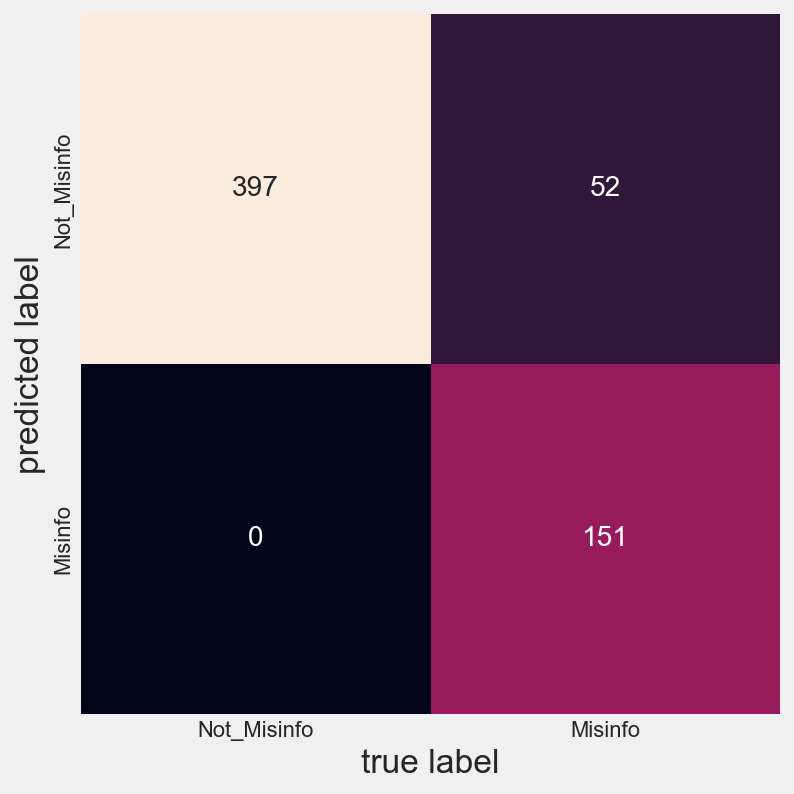

In [86]:
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_test_lem, t_rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Misinfo', 'Misinfo'], yticklabels=['Not_Misinfo', 'Misinfo'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
import streamlit as st  ## streamlit
import pandas as pd  ## for data manipulation
import pickle   ## For model loading 
import spacy  ## For NLP tasks 
import time
from io import StringIO  ## for text input and output from the web app
from PIL import Image   ## For image

#Load the model the trained model which saved as a pickle file
def load_model():

#declare global variables
    global nlp
    global textcat

nlp = spacy.load(model_path)  ## will load the model from the model_path "(need to export/save the model and copy the path)"
textcat = nlp.get_pipe(model_file)   ## will load the model file "(put the .pickle model inside)"

# After loading the model, we'll use it to make a prediction on the tweet for classification.
# The prediction function will take the tweet as input and then first vectorize the tweet and then will classify it using our model
# 2 categories: misinformation or not, if the prediction is 1 means misinformation and 0 means affirmative
def predict(tweet):
    print("news = ", tweet)  ## tweet
    news = [tweet]
    txt_docs = list(nlp.pipe(tweet)) 
    scores, _ = textcat.predict(txt_docs)
    print(scores)
    predicted_classes = scores.argmax(axis=1)
    print(predicted_classes)
    result = ['misinformation' if lbl == 1 else 'affirmative' for lbl in predicted_classes]
    print(result)
    return(result)

# The run function will take the input from the user via our app as a text or text file 
# and after pressing the button it will give the output
def run():
    st.sidebar.info('You can either enter the news item online in the textbox or upload a txt file')
    st.set_option('deprecation.showfileUploaderEncoding', False)
    add_selectbox = st.sidebar.selectbox("How would you like to face reality?", ("Online", "Txt file"))
    st.title("Predicting misinformation tweet")
    st.header('This app is created to predict if a tweet is misinformation or not')
    if add_selectbox == "Online":
        text1 = st.text_area('Enter text')
        output = ""
        if st.button("Face reality"):
            output = predict(text1)
            output = str(output[0]) # since its a list, get the 1st item
            st.success(f"The news item is {output}")
            st.balloons()
      elif add_selectbox == "Txt file":
           output = ""
          file_buffer = st.file_uploader("Upload text file for new item", type=["txt"])
         if st.button("Face reality"):
             text_news = file_buffer.read()

# in the latest stream-lit version ie. 68, we need to explicitly convert bytes to text
          st_version = st.__version__ # eg 0.67.0
          versions = st_version.split('.')
          if int(versions[1]) > 67:
               text_news = text_news.decode('utf-8')
            print(text_news)
          output = predict(text_news)
          output = str(output[0])
          st.success(f"The news item is {output}")
          st.balloons()

# Execute the code only if the file was run directly and not imported.
# The module is being used standalone by the user to do corresponding appropriate actions.
if __name__ == "__main__":
load_model()
run()